**рекуррентная нейронная сеть Элмана**

Евгений Борисов <esborisov@sevsu.ru>


построим простую языковая модель и
обучим её предсказывать последнюю букву в слове


---

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt

## генерируем данные

In [2]:
# # Федор Михайлович Достоевский "Бесы"
# text='''
# Приступая к описанию недавних и столь странных событий, происшедших в нашем, доселе ничем не отличавшемся городе, я принужден, по неумению моему, начать несколько издалека, а именно некоторыми биографическими подробностями о талантливом и многочтимом Степане Трофимовиче Верховенском. Пусть эти подробности послужат лишь введением к предлагаемой хронике, а самая история, которую я намерен описывать, еще впереди.
# Скажу прямо: Степан Трофимович постоянно играл между нами некоторую особую и так-сказать гражданскую роль и любил эту роль до страсти, - так даже, что, мне кажется, без нее и прожить не мог. Не то чтоб уж я его приравнивал к актеру на театре: сохрани боже, тем более, что сам его уважаю. Тут всё могло быть делом привычки, или, лучше сказать, беспрерывной и благородной склонности, с детских лет, к приятной мечте о красивой гражданской своей постановке. Он, например, чрезвычайно любил свое положение "гонимого" и так-сказать "ссыльного". В этих обоих словечках есть своего рода классический блеск, соблазнивший его раз навсегда, и, возвышая его потом постепенно в собственном мнении, в продолжение столь многих лет, довел его наконец до некоторого весьма высокого и приятного для самолюбия пьедестала. В одном сатирическом английском романе прошлого столетия, некто Гуливер, возвратясь из страны лилипутов, где люди были всего в какие-нибудь два вершка росту, до того приучился считать себя между ними великаном, что и ходя по улицам Лондона, невольно кричал прохожим и экипажам, чтоб они пред ним сворачивали и остерегались, чтоб он как-нибудь их не раздавил, воображая, что он всё еще великан, а они маленькие. За это смеялись над ним и бранили его, а грубые кучера даже стегали великана кнутьями; но справедливо ли? Чего не может сделать привычка? Привычка привела почти к тому же и Степана Трофимовича, но еще в более невинном и безобидном виде, если можно так выразиться, потому что прекраснейший был человек.
# Я даже так думаю, что под конец его все и везде позабыли; но уже никак ведь нельзя сказать, что и прежде совсем не знали. Бесспорно, что и он некоторое время принадлежал к знаменитой плеяде иных прославленных деятелей нашего прошедшего поколения, и, одно время, - впрочем, всего только одну самую маленькую минуточку, - его имя многими тогдашними торопившимися людьми произносилось чуть не на ряду с именами Чаадаева, Белинского, Грановского и только что начинавшего тогда за границей Герцена. Но деятельность Степана Трофимовича окончилась почти в ту же минуту, как и началась, - так-сказать, от "вихря сошедшихся обстоятельств". И что же? Не только "вихря", но даже и "обстоятельств" совсем потом не оказалось, по крайней мере в этом случае. Я только теперь, на днях, узнал, к величайшему моему удивлению, но зато уже в совершенной достоверности, что Степан Трофимович проживал между нами, в нашей губернии, не только не в ссылке, как принято было у нас думать, но даже и под присмотром никогда не находился. Какова же после этого сила собственного воображения! Он искренно сам верил всю свою жизнь, что в некоторых сферах его постоянно опасаются, что шаги его беспрерывно известны и сочтены, и что каждый из трех сменившихся у нас в последние двадцать лет губернаторов, въезжая править губернией, уже привозил с собою некоторую особую и хлопотливую о нем мысль, внушенную ему свыше и прежде всего, при сдаче губернии. Уверь кто-нибудь тогда честнейшего Степана Трофимовича неопровержимыми доказательствами, что ему вовсе нечего опасаться, и он бы непременно обиделся. А между тем это был ведь человек умнейший и даровитейший, человек так-сказать даже науки, хотя впрочем в науке... ну, одним словом, в науке он сделал не так много и, кажется, совсем ничего. Но ведь с людьми науки у нас на Руси это сплошь да рядом случается.
# '''
# display(len(text))

In [3]:
# Федор Михайлович Достоевский "Бесы"
text='''
Приступая к описанию недавних и столь странных событий, происшедших в нашем, 
доселе ничем не отличавшемся городе, я принужден, по неумению моему, 
начать несколько издалека, а именно некоторыми биографическими подробностями 
о талантливом и многочтимом Степане Трофимовиче Верховенском. 
Пусть эти подробности послужат лишь введением к предлагаемой хронике, 
а самая история, которую я намерен описывать, еще впереди.
'''
display(len(text))

420

In [4]:
# abc[:7]

In [5]:
import re

# выполняем токенизацию - режем текст на слова
words = sorted(set([ 
        w for w in re.sub(r'[\W]',' ',text).split() # выкидываем лишние символы
        if len(w)>3 # выкинем короткие слова
    ]))

display(words)

['Верховенском',
 'Приступая',
 'Пусть',
 'Степане',
 'Трофимовиче',
 'биографическими',
 'введением',
 'впереди',
 'городе',
 'доселе',
 'издалека',
 'именно',
 'история',
 'которую',
 'лишь',
 'многочтимом',
 'моему',
 'намерен',
 'начать',
 'нашем',
 'недавних',
 'некоторыми',
 'несколько',
 'неумению',
 'ничем',
 'описанию',
 'описывать',
 'отличавшемся',
 'подробности',
 'подробностями',
 'послужат',
 'предлагаемой',
 'принужден',
 'происшедших',
 'самая',
 'событий',
 'столь',
 'странных',
 'талантливом',
 'хронике']

In [6]:
# алфавит
abc = sorted(set(''.join(words)))
# abc = sorted(set(text))

# нумеруем символы алфавита для замены символов их номерами
abc_enc = { c:i+1 for i,c in enumerate(abc) }

# обратное преобразование - по номеру определяем символ
abc_dec = { v:k for k,v in abc_enc.items() }

display(abc_enc)

{'В': 1,
 'П': 2,
 'С': 3,
 'Т': 4,
 'а': 5,
 'б': 6,
 'в': 7,
 'г': 8,
 'д': 9,
 'е': 10,
 'ж': 11,
 'з': 12,
 'и': 13,
 'й': 14,
 'к': 15,
 'л': 16,
 'м': 17,
 'н': 18,
 'о': 19,
 'п': 20,
 'р': 21,
 'с': 22,
 'т': 23,
 'у': 24,
 'ф': 25,
 'х': 26,
 'ч': 27,
 'ш': 28,
 'ы': 29,
 'ь': 30,
 'ю': 31,
 'я': 32}

In [7]:
# кодируем слова
code = [ list(map(abc_enc.get,w)) for w in words ]
display(code)

[[1, 10, 21, 26, 19, 7, 10, 18, 22, 15, 19, 17],
 [2, 21, 13, 22, 23, 24, 20, 5, 32],
 [2, 24, 22, 23, 30],
 [3, 23, 10, 20, 5, 18, 10],
 [4, 21, 19, 25, 13, 17, 19, 7, 13, 27, 10],
 [6, 13, 19, 8, 21, 5, 25, 13, 27, 10, 22, 15, 13, 17, 13],
 [7, 7, 10, 9, 10, 18, 13, 10, 17],
 [7, 20, 10, 21, 10, 9, 13],
 [8, 19, 21, 19, 9, 10],
 [9, 19, 22, 10, 16, 10],
 [13, 12, 9, 5, 16, 10, 15, 5],
 [13, 17, 10, 18, 18, 19],
 [13, 22, 23, 19, 21, 13, 32],
 [15, 19, 23, 19, 21, 24, 31],
 [16, 13, 28, 30],
 [17, 18, 19, 8, 19, 27, 23, 13, 17, 19, 17],
 [17, 19, 10, 17, 24],
 [18, 5, 17, 10, 21, 10, 18],
 [18, 5, 27, 5, 23, 30],
 [18, 5, 28, 10, 17],
 [18, 10, 9, 5, 7, 18, 13, 26],
 [18, 10, 15, 19, 23, 19, 21, 29, 17, 13],
 [18, 10, 22, 15, 19, 16, 30, 15, 19],
 [18, 10, 24, 17, 10, 18, 13, 31],
 [18, 13, 27, 10, 17],
 [19, 20, 13, 22, 5, 18, 13, 31],
 [19, 20, 13, 22, 29, 7, 5, 23, 30],
 [19, 23, 16, 13, 27, 5, 7, 28, 10, 17, 22, 32],
 [20, 19, 9, 21, 19, 6, 18, 19, 22, 23, 13],
 [20, 19, 9, 21, 19

In [8]:
# максимальная длина слова
max_len = max(map(len,code))
display(max_len)

abc_dec[0] = '' # добавляем в алфавит "пустой" символ

# дополняем короткие коды слов нулями до единого размера
code = np.array([ [0]*(max_len-len(c))+c for c in code ])
display(code.shape)
display(code)

15

(40, 15)

array([[ 0,  0,  0,  1, 10, 21, 26, 19,  7, 10, 18, 22, 15, 19, 17],
       [ 0,  0,  0,  0,  0,  0,  2, 21, 13, 22, 23, 24, 20,  5, 32],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2, 24, 22, 23, 30],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3, 23, 10, 20,  5, 18, 10],
       [ 0,  0,  0,  0,  4, 21, 19, 25, 13, 17, 19,  7, 13, 27, 10],
       [ 6, 13, 19,  8, 21,  5, 25, 13, 27, 10, 22, 15, 13, 17, 13],
       [ 0,  0,  0,  0,  0,  0,  7,  7, 10,  9, 10, 18, 13, 10, 17],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  7, 20, 10, 21, 10,  9, 13],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  8, 19, 21, 19,  9, 10],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  9, 19, 22, 10, 16, 10],
       [ 0,  0,  0,  0,  0,  0,  0, 13, 12,  9,  5, 16, 10, 15,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 13, 17, 10, 18, 18, 19],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13, 22, 23, 19, 21, 13, 32],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 15, 19, 23, 19, 21, 24, 31],
       [ 0,  0,  0,  0,  0,  0,  0

In [9]:
# формируем датасет
X = code[:,:-1] # начало слова
y = code[:,[-1]] # последний символ слова

display(X.shape,y.shape)

(40, 14)

(40, 1)

In [10]:
# формируем входы и выходы для нейросети

# максимальный номер слова
max_code = code.max()
display(max_code)

# выполняем унитарное кодирование (OHE, one hot encoding) номеров символов 
# т.е. заменяем номер символа в последовательности на вектор [0,1] длинны max_code
X = np.eye(max_code+1)[X]
display(X.shape)

y = np.eye(max_code+1)[y.flatten()]
display(y.shape)

32

(40, 14, 33)

(40, 33)

In [15]:
# X[7,8,:]

In [16]:
X_train, y_train = X, y
X_test,  y_test  = X, y

## строим модель

рекуррентная сеть Элмана 

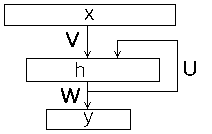

In [18]:
def state(x,w,b=0.): # состояние нейронов
    return x.dot(w) + b

In [19]:
def bp_sigmoid(u): # функция активации
    return np.tanh(u)

def d_bp_sigmoid(u): # производная активации
    return 1./(np.cosh(u)**2)

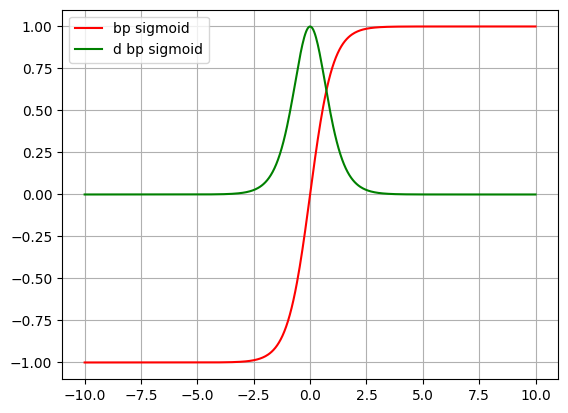

In [20]:
u=np.linspace(-10,10,500)
plt.plot( u,bp_sigmoid(u),'-r', label='bp sigmoid' )
plt.plot( u,d_bp_sigmoid(u),'-g', label='d bp sigmoid' )
plt.grid()
plt.legend()

In [21]:
def layer_rc(x,w,w1,b): # выход рекурентного слоя
    seq_len = x.shape[1] # длина последовательности 
    n_samples = x.shape[0] # количество примеров
    o = np.zeros( shape=(n_samples,w1.shape[0]) ) # начальные значения памяти сети
    for i in range(seq_len): # прогоняем через сеть последовательность примеров
        o = bp_sigmoid( state(x[:,i,:],w) + state(o,w1) + b )
    return o

def layer_ff(x,w,b): # выход слоя прямого распространения
    return bp_sigmoid( state( x,w,b) )

In [22]:
def score(x,weight): # выход сети по схеме many-to-one
    w,w1,b = weight[0] # веса первого обрабатывающего слоя и веса обратной связи
    o = layer_rc(x,w,w1,b)
    
    w,b = weight[1]
    o = layer_ff(o,w,b)
        
    return o

In [23]:
# инициализация параметров сети
def weight_init(input_size,hidden_size,output_size):
    return [ 
        [ 
            rng.normal( size=(input_size,hidden_size),scale=.1), 
            rng.normal( size=(hidden_size,hidden_size),scale=.1), 
            rng.normal( size=(1,hidden_size),scale=.1), 
        ],
        [ 
            rng.normal( size=(hidden_size,output_size),scale=.1), 
            rng.normal( size=(1,output_size),scale=.1), 
        ],
    ]

## обучаем модель

функция потери средняя квадратичная ошибка
$$L=MSQE(y,o)=\frac{1}{m}\sum\limits_{i=0}^m(o_i-y_i)^2$$

In [24]:
def msqe(y,o): # функция потери - средняя квадратичная ошибка
    return np.square(o-y).sum()/(len(y)*y.shape[1])

loss = msqe

модификация back propagation для рекуррентных сетей - BPTT

In [25]:
def forward(x,weight): # прямой проход
    layers_state = []
    layers_output = []
    
    seq_len = x.shape[1] # длина последовательности 
    n_samples = x.shape[0] # количество примеров

    w,w1,b = weight[0]
    o = np.zeros( shape=(n_samples,w1.shape[0]) ) # начальные значения памяти сети
     
    for i in range(seq_len): # прогоняем через сеть последовательность примеров
        s = state(x[:,i,:],w) + state(o,w1) + b # состояние скрытого слоя
        layers_state.append(s)
        o = bp_sigmoid(s) # выход скрытого слоя
        layers_output.append(o)
        
    w,b = weight[1]
    s = state(o,w,b) 
    layers_state.append(s)
    o = bp_sigmoid(s)
    layers_output.append(o)    
    
    return (
        layers_state, # состояние слоёв сети для каждого элемента последовательности
        layers_output # выходы слоёв сети для каждого элемента последовательности
    )

In [26]:
def backward(d_output,layers_state,weight): # обратный проход
    delta = [ d_output ]
    
    # ошибка скрытого слоя на последнем элементе входной последовательности
    w,_ = weight[1]
    s = layers_state[-2]
    d = d_output.dot(w.T) * d_bp_sigmoid(s)
    delta.append(d)
    
    w,w1,_ = weight[0]
    for s in layers_state[:-2][::-1]: # выкинуть последние два, список в обратном порядке
        d = d_bp_sigmoid(s)*d.dot(w1.T)
        delta.append(d)

    return delta[::-1] # значение ошибки для всех нейронов скрытых слоёв

In [27]:
def weight_norm(weight): # нормируем значения градиента
    w_max = max([ np.abs(w).max() for l in weight for w in l ])
    if w_max>0.: return [ [ w/w_max for w in l ] for l in weight ]
    return weight

In [28]:
def msqe_partial(x,weight,y): # градиент функции потери
    seq_len = x.shape[1] # длинна последовательностей

    layers_state, layers_output = forward(x,weight) # состояния и выходы всех нейронов сети
    d_output = (layers_output[-1]-y)* d_bp_sigmoid(layers_state[-1]) # ошибка выходного слоя
    delta = backward(d_output,layers_state,weight) # значение ошибки для всех нейронов скрытых слоёв

    dw0,dw0r,db0 = 0.,0.,0.
    for i in range(0,seq_len-1):
        dw0 += x[:,i,:].T.dot( delta[i] )
        dw0r += layers_output[i].T.dot( delta[i] )
        db0 += delta[i].sum(axis=0,keepdims=True) 
    
    dw1 = layers_state[-2].T.dot(delta[-1])
    db1 = delta[-1].sum(axis=0,keepdims=True)
    
    return weight_norm([[dw0,dw0r,db0],[dw1,db1]]) # нормируем значения градиента

gradient = msqe_partial

In [29]:
# корректируем параметры
def weight_adjust(weight,d_weight,lr):
    return [ 
        [ w-lr*dw for w,dw in zip(*l) ]  
        for l in zip(weight,d_weight) 
    ]

In [30]:
def fit_epoch(x,weight,y,lr): # шаг обучения модели
    d_weight = gradient(x,weight,y) # градиент функции потери, изменение весов
    return weight_adjust(weight,d_weight,lr) # корректируем параметры

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
weight = weight_init(input_size=X_train.shape[-1],hidden_size=25,output_size=y_train.shape[-1])

In [33]:
%%time

from tqdm.auto import tqdm
# метод градиентного спуска

lr = 2e-2 # скорость обучени
n_samples = len(y_train) # количество примеров
n_epoch = 200 # максимальное число циклов обучения
acc_min = .95 # порог минимально допустимой погрешности модели

target = np.argmax(y_train, axis=1 )

# начальное значение ф-ции потери
loss_history = [ loss(y_train,score(X_train,weight)) ]
acc_history = [ accuracy_score( target, np.argmax(score(X_train,weight),axis=1) ) ]
                               

for i in tqdm(range(n_epoch)): # цикл обучения
    weight = fit_epoch(X_train,weight,y_train,lr) # корректируем веса модели
    loss_history.append( loss(y_train,score(X_train,weight)) ) # считаем значение ф-ции потери
    acc_history.append( accuracy_score( target, np.argmax(score(X_train,weight),axis=1) ) )
    
    if acc_history[-1] > acc_min: # проверяем достижение минимального порога погрешности модели
        print('step %i/%i: loss %.03f, acc threshold %.03f reached\n'%(i+1,n_epoch,loss_history[-1],acc_min))
        break

  0%|          | 0/200 [00:00<?, ?it/s]

CPU times: user 399 ms, sys: 1.38 ms, total: 401 ms
Wall time: 400 ms


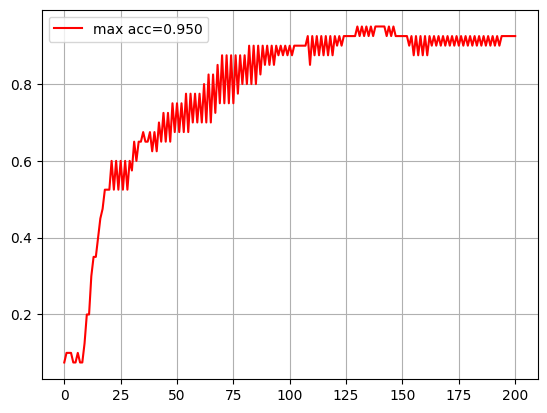

In [34]:
# история изменения значений погрешности модели
plt.plot(acc_history,label='max acc=%.3f'%(max(acc_history)),color='r')
plt.grid()
plt.legend()

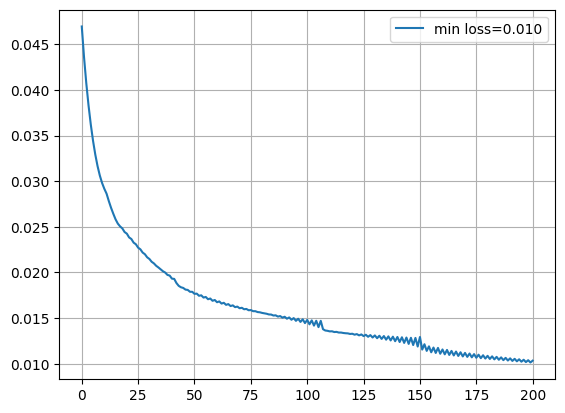

In [35]:
# история изменения значений ф-ции потери
plt.plot(loss_history,label='min loss=%.3f'%(min(loss_history)))
plt.grid()
plt.legend()

## тестируем модель

In [36]:
p = np.argmax(score(X_test,weight), axis=1 )
target = np.argmax(y_test, axis=1 )

In [37]:
from sklearn.metrics import classification_report
labels = list(map(abc_dec.get, sorted(set(target)) ))
print(classification_report(target,p,target_names=labels))

              precision    recall  f1-score   support

           а       0.00      0.00      0.00         1
           е       1.00      1.00      1.00         5
           и       0.83      1.00      0.91         5
           й       1.00      1.00      1.00         2
           м       1.00      1.00      1.00         6
           н       1.00      1.00      1.00         2
           о       0.67      1.00      0.80         2
           т       1.00      1.00      1.00         1
           у       0.00      0.00      0.00         1
           х       1.00      1.00      1.00         3
           ь       1.00      1.00      1.00         5
           ю       0.75      1.00      0.86         3
           я       1.00      0.75      0.86         4

    accuracy                           0.93        40
   macro avg       0.79      0.83      0.80        40
weighted avg       0.89      0.93      0.90        40



/opt/venv/jupyter_1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/venv/jupyter_1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/venv/jupyter_1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import pandas as pd


code = np.argmax(X_test,axis=-1)
    
# декодируем слова
df = pd.DataFrame({
    'sequence': [ ''.join(list(map(abc_dec.get,c))) for c in code ],
    'target':list(map(abc_dec.get,target)),
    'predicted':list(map(abc_dec.get,p)),
})


def mark_error(d): return 'color:red' if d else 'color:green'
df['is_error'] = df['target']!=df['predicted']

df.style.applymap(mark_error,subset=['is_error'])


,sequence,target,predicted,is_error
0,Верховенско,м,м,False
1,Приступа,я,я,False
2,Пуст,ь,ь,False
3,Степан,е,е,False
4,Трофимович,е,е,False
5,биографическим,и,и,False
6,введение,м,м,False
7,вперед,и,и,False
8,город,е,е,False
9,досел,е,е,False
